In [14]:
import ML_Coupling.mo_descriptor as md
import ML_Coupling.nn_frame as nn
import ML_Coupling.tools as tool
import numpy as np
import subprocess
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl

subprocess.run('export TF_INTRA_OP_PARALLELISM_THREADS=12', shell=True)

BOHR = 0.52917721092
au2ev = 27.2114
des_type = '0_6'


# Making additional MO overlap descriptors

In [15]:
'''
prepare data_set
1. make mo_pair descriptor
'''
BOHR = 0.52917721092
au2ev = 27.2114

def rotate(vec, degree, axis='x'):
    angle = degree / 180 * np.pi    
    if axis == 'x':
        rot_tm = np.array([[1,0,0], [0, np.cos(angle), -np.sin(angle)],[0, np.sin(angle), np.cos(angle)]])
    elif axis =='z':
        rot_tm = np.array([[np.cos(angle), -np.sin(angle), 0],[np.sin(angle), np.cos(angle), 0], [0,0,1]])
    vec_r = np.einsum('ij,jk->ik', vec, rot_tm)
    return vec_r

if des_type == 'y_bend_5_sg':
    x_shift = np.arange(0, 4.01, 0.1)
    y_shift = np.arange(0, 4.01, 0.1)
    z_shift = np.arange(3.5, 3.51, 0.1)
    homo = md.MO_descriptor('./dist_nap.plots/mo.34.cube').make(c_type='int',unit='bohr')
    print('1 ',des_type)
elif des_type == 'x_rot_10_sg':
    x_shift = np.arange(0, 4.01, 0.2)
    y_shift = np.arange(0, 4.01, 0.2)
    z_shift = np.arange(4.0, 4.01, 0.1)
    homo = md.MO_descriptor('../../data/homo-s0.cube').make(c_type='int',unit='bohr')
    print('2 ',des_type)
elif des_type == 'x_rot_10_db':
    x_shift = np.arange(0, 4.01, 0.2)
    y_shift = np.arange(0, 4.01, 0.2)
    z_shift = np.arange(4.0, 4.01, 0.1)
    homo = md.MO_descriptor('../../data/homo-s0.cube').make(c_type='int',unit='bohr')
    print('3 ',des_type)
    
    _homo_ = np.zeros(homo.shape)
    rot_x = 10 / 180 * np.pi    # rotation angle along x axis
    rot_tm = np.array([[1,0,0], [0, np.cos(rot_x), -np.sin(rot_x)],[0, np.sin(rot_x), np.cos(rot_x)]]) # rotate along x
    _homo_[:,0] = homo[:,0]
    _homo_[:,1:] = np.einsum('ij,jk->ik', homo[:,1:], rot_tm)

elif des_type == 'z_rot_10_sg':
    x_shift = np.arange(0, 4.01, 0.2)
    y_shift = np.arange(0, 4.01, 0.2)
    z_shift = np.arange(3.5, 3.51, 0.1)
    homo = md.MO_descriptor('../../data/homo-s0.cube').make(c_type='int',unit='bohr')
    print('4 ',des_type)
elif des_type == '0_6':
    x_shift = np.arange(0, 6.01, 0.2)
    y_shift = np.arange(0, 6.01, 0.2)
    z_shift = np.arange(3.5, 3.51, 0.1)
    homo = md.MO_descriptor('../../data/homo-s0.cube').make(c_type='int',unit='bohr')
    print('5 ',des_type)

homo_pair = md.MO_pair_descriptor(homo, homo).make()
std_shape_h = homo_pair.shape
homo_pairs = np.zeros((len(x_shift)*len(y_shift)*len(z_shift),) + std_shape_h)
homo_ = np.zeros(homo.shape)

for kk, k in enumerate(z_shift):
    for ii, i in enumerate(x_shift):
        for jj, j in enumerate(y_shift):
            idx = kk * len(x_shift) * len(y_shift) + ii * len(y_shift) + jj
            homo_[:,0] = np.add(homo[:,0],0)
            homo_[:,1] = np.add(homo[:,1],i / BOHR)
            homo_[:,2] = np.add(homo[:,2],j / BOHR)
            homo_[:,3] = np.add(homo[:,3],k / BOHR)

            if (des_type.split('_')[1] == 'rot') and (des_type.split('_')[0] == 'x'):
                homo_[:,1:] = rotate(homo_[:,1:],10,axis='x')
                if des_type.split('_')[-1] == 'db':
                    homo_pair_ = md.MO_pair_descriptor(_homo_, homo_).make()
                    print('7 db')
                else:
                    homo_pair_ = md.MO_pair_descriptor(homo, homo_).make()
                    print('8 sg')
            elif (des_type.split('_')[1] == 'rot') and (des_type.split('_')[0] == 'z'):
                homo_[:,1:] = rotate(homo_[:,1:],10,axis='z')
                homo_pair_ = md.MO_pair_descriptor(homo, homo_).make()
                print('9 zrot')

            else:
                print('10 ', des_type)
                homo_pair_ = md.MO_pair_descriptor(homo, homo_).make()
            
            homo_pairs[idx] = homo_pair_

print(homo_pairs.shape)

# save_name = '../../data/jpcl_makeup/homo_homo_pair_%s.npy'%des_type
# print("Saving to %s"%save_name)
# np.save(save_name, homo_pairs)


1 start clustering
2 start getting center


/home/jingheng/venv/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


5  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
10  0_6
1

# Extrapolation of the current model

In [18]:
homo_pairs = np.load('../../data/jpcl_makeup/homo_homo_pair_%s.npy'%des_type)
    
raw_data1 = abs(np.loadtxt('../../data/jpcl_makeup/results_trans_%s_makeup.csv'%des_type, delimiter=',',comments='#'))
raw_data2 = abs(np.loadtxt('../../data/results.csv', delimiter=',',comments='#'))
print(raw_data1.shape)
print(raw_data2.shape)

raw_data1 = abs(raw_data1)[:,3]
print(raw_data1.shape)
print(raw_data2.shape)



(961, 6)
(68921, 6)
(961,)
(68921, 6)


In [20]:
# original_1 = tf.keras.models.load_model('../../trained_model2/rot2/nat_dimer_homo_rot2_13373/model', compile=False)
# original_2 = tf.keras.models.load_model('../../trained_model2/rot2/nat_dimer_homo_rot2_7429/model', compile=False)
# original_1 = tf.keras.models.load_model('../../article_model/mix2/nat_dimer_homo_mix_28476/model', compile=False)
# original_2 = tf.keras.models.load_model('../../article_model/mix2/nat_dimer_homo_mix_15821/model', compile=False)
original_1 = tf.keras.models.load_model('../../article_model/trans/nat_dimer_homo_trans_53716/model', compile=False) # 80 \%
original_2 = tf.keras.models.load_model('../../article_model/trans/nat_dimer_homo_trans_33572/model', compile=False) # 50 \%
original_3 = tf.keras.models.load_model('../../article_model/trans/nat_dimer_homo_trans_6715/model', compile=False) # 10 \%


base1 = np.exp(-original_1(homo_pairs, training=False).numpy().reshape((len(homo_pairs),)))
base2 = np.exp(-original_2(homo_pairs, training=False).numpy().reshape((len(homo_pairs),)))
base3 = np.exp(-original_3(homo_pairs, training=False).numpy().reshape((len(homo_pairs),)))


# error_base1 = np.mean(np.multiply(abs(base1-raw_data1[:,3]), np.power(raw_data1[:,3],-1))*100)
error_base1 = np.mean(abs(base1-raw_data1)*27.2114*1000)
error_base2 = np.mean(abs(base2-raw_data1)*27.2114*1000)
error_base3 = np.mean(abs(base3-raw_data1)*27.2114*1000)


print(error_base1, error_base2, error_base3)

2.4615471863753053 3.135214630063398 16.540211943165264


(961,)


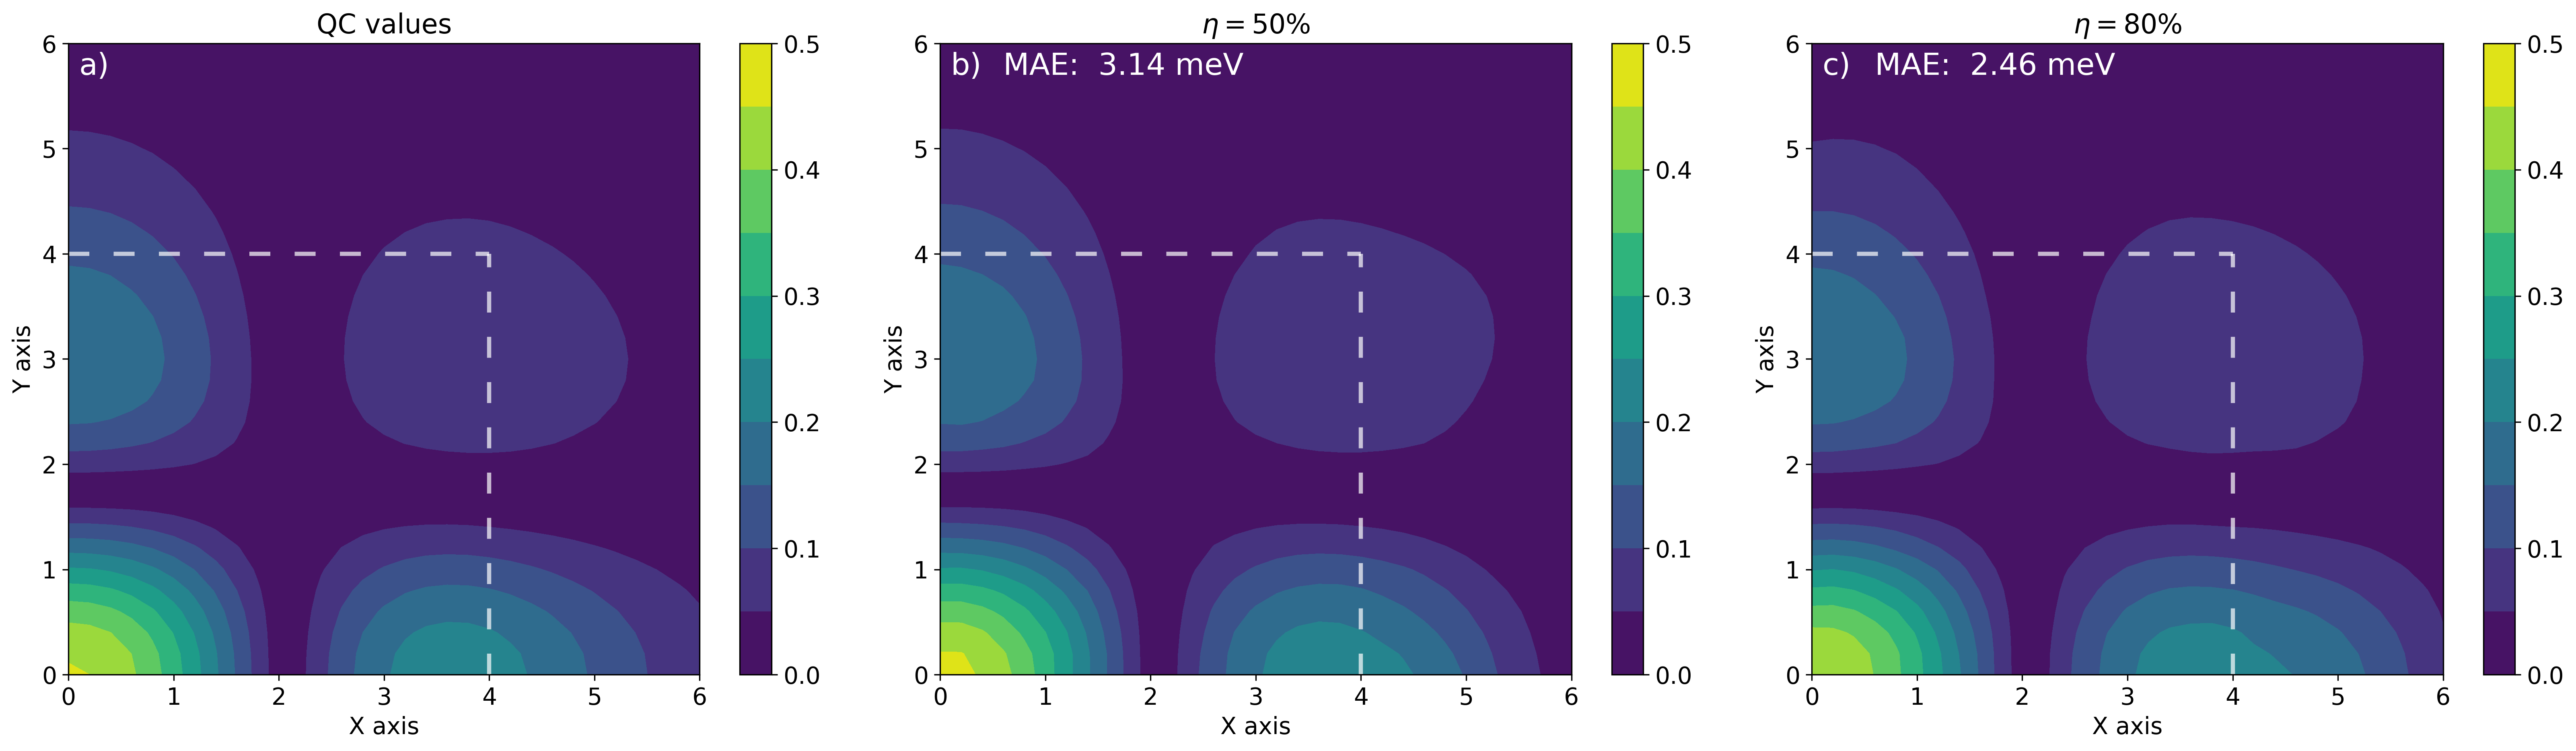

In [22]:
# Z =raw_data2[:,3].reshape((41,41))
print(raw_data1.shape)
Z0=raw_data1.reshape((31,31)) * au2ev
Z1=base1.reshape((31,31)) * au2ev # 90
Z2=base2.reshape((31,31)) * au2ev # 50

x = np.linspace(0, 6, 31)
y = np.linspace(0, 6, 31)

line = np.arange(0,4.1,0.1)
amp = np.ones(len(line))*4


Z_ = np.array([Z0,Z2,Z1])
anna = np.array(['a)','b)','c)'])
titles = np.array(['QC values', '$\eta=50\%$', '$\eta=80\%$'])

# l = np.linspace(np.min(Z0),np.max(Z2),11)
l = np.linspace(0,0.5,11)


fig2, ax2 = plt.subplots(1,3,figsize=(22,6), dpi=300)
plt.rcParams.update({'font.size':14})
# plt.rc('font',family='Times New Roman')
for ii,i in np.ndenumerate(anna):
    exec('a%d = ax2[ii].contourf(x,y, Z_[ii].T,levels= l)'%(ii))
    ax2[ii].contourf(x,y, Z_[ii].T,levels= l)
    ax2[ii].set_aspect('equal')
    ax2[ii].set_title(titles[ii],fontsize=16)
    ax2[ii].set_xlabel('X axis',fontsize=14)
    ax2[ii].set_ylabel('Y axis',fontsize=14)
    ax2[ii].annotate(anna[ii],(0.1,5.7),fontsize=18,color='w')
    ax2[ii].set_yticks(np.arange(0,6.01,1))
    ax2[ii].set_xticks(np.arange(0,6.01,1))
    exec('fig2.colorbar(a%d,ax=ax2[ii])'%(ii))
    ax2[ii].plot(line,amp,color='w', linestyle=(0,(5,5.8)),alpha=0.7, linewidth=2.5)
    ax2[ii].plot(amp,line,color='w', linestyle=(0,(5,5.8)),alpha=0.7, linewidth=2.5)


ax2[1].annotate('MAE: %5.2f meV'%error_base2, (0.6,5.7), fontsize=18,color='w')
ax2[2].annotate('MAE: %5.2f meV'%error_base1, (0.6,5.7), fontsize=18,color='w')

plt.tight_layout()
# plt.savefig('./Extension_0_6_trans_80_50.png')


# Baseline model with the six intermolecular descriptors

In [23]:
homo_pairs = np.load('../../data/jpcl_makeup/baseline.npy')
    
raw_data1 = abs(np.loadtxt('../../data/results.csv', delimiter=',',comments='#'))
raw_data2 = abs(np.loadtxt('../../data/results.csv', delimiter=',',comments='#'))

n = 5
istart = n * 1681
iend = (n+1) * 1681
raw_data2 = abs(raw_data2[istart:iend])
raw_data1 = abs(raw_data1[istart:iend])
print(raw_data1.shape)
print(raw_data2.shape)


(1681, 6)
(1681, 6)


## Translation

In [24]:
original_1 = tf.keras.models.load_model('./trained_model/trans/nat_dimer_baseline_trans_60430/model', compile=False)
original_2 = tf.keras.models.load_model('./trained_model/trans/nat_dimer_baseline_trans_33572/model', compile=False)
original_3 = tf.keras.models.load_model('./trained_model/trans/nat_dimer_baseline_trans_6715/model', compile=False)

base1 = np.exp(-original_1(homo_pairs[istart:iend], training=False).numpy().reshape((len(homo_pairs[istart:iend]),)))
base2 = np.exp(-original_2(homo_pairs[istart:iend], training=False).numpy().reshape((len(homo_pairs[istart:iend]),)))
base3 = np.exp(-original_3(homo_pairs[istart:iend], training=False).numpy().reshape((len(homo_pairs[istart:iend]),)))

# error_base1 = np.mean(np.multiply(abs(base1-raw_data1[:,3]), np.power(raw_data1[:,3],-1))*100)
error_base1 = np.mean(abs(base1-raw_data1[:,3])*27.2114*1000)
error_base2 = np.mean(abs(base2-raw_data1[:,3])*27.2114*1000)
error_base3 = np.mean(abs(base3-raw_data1[:,3])*27.2114*1000)


print(error_base1, error_base2, error_base3)

0.2980754389911633 0.2879531521718122 1.4508202059634225


41
[(0, 0), (0, 1), (1, 0), (1, 1)]
41
41
41
41


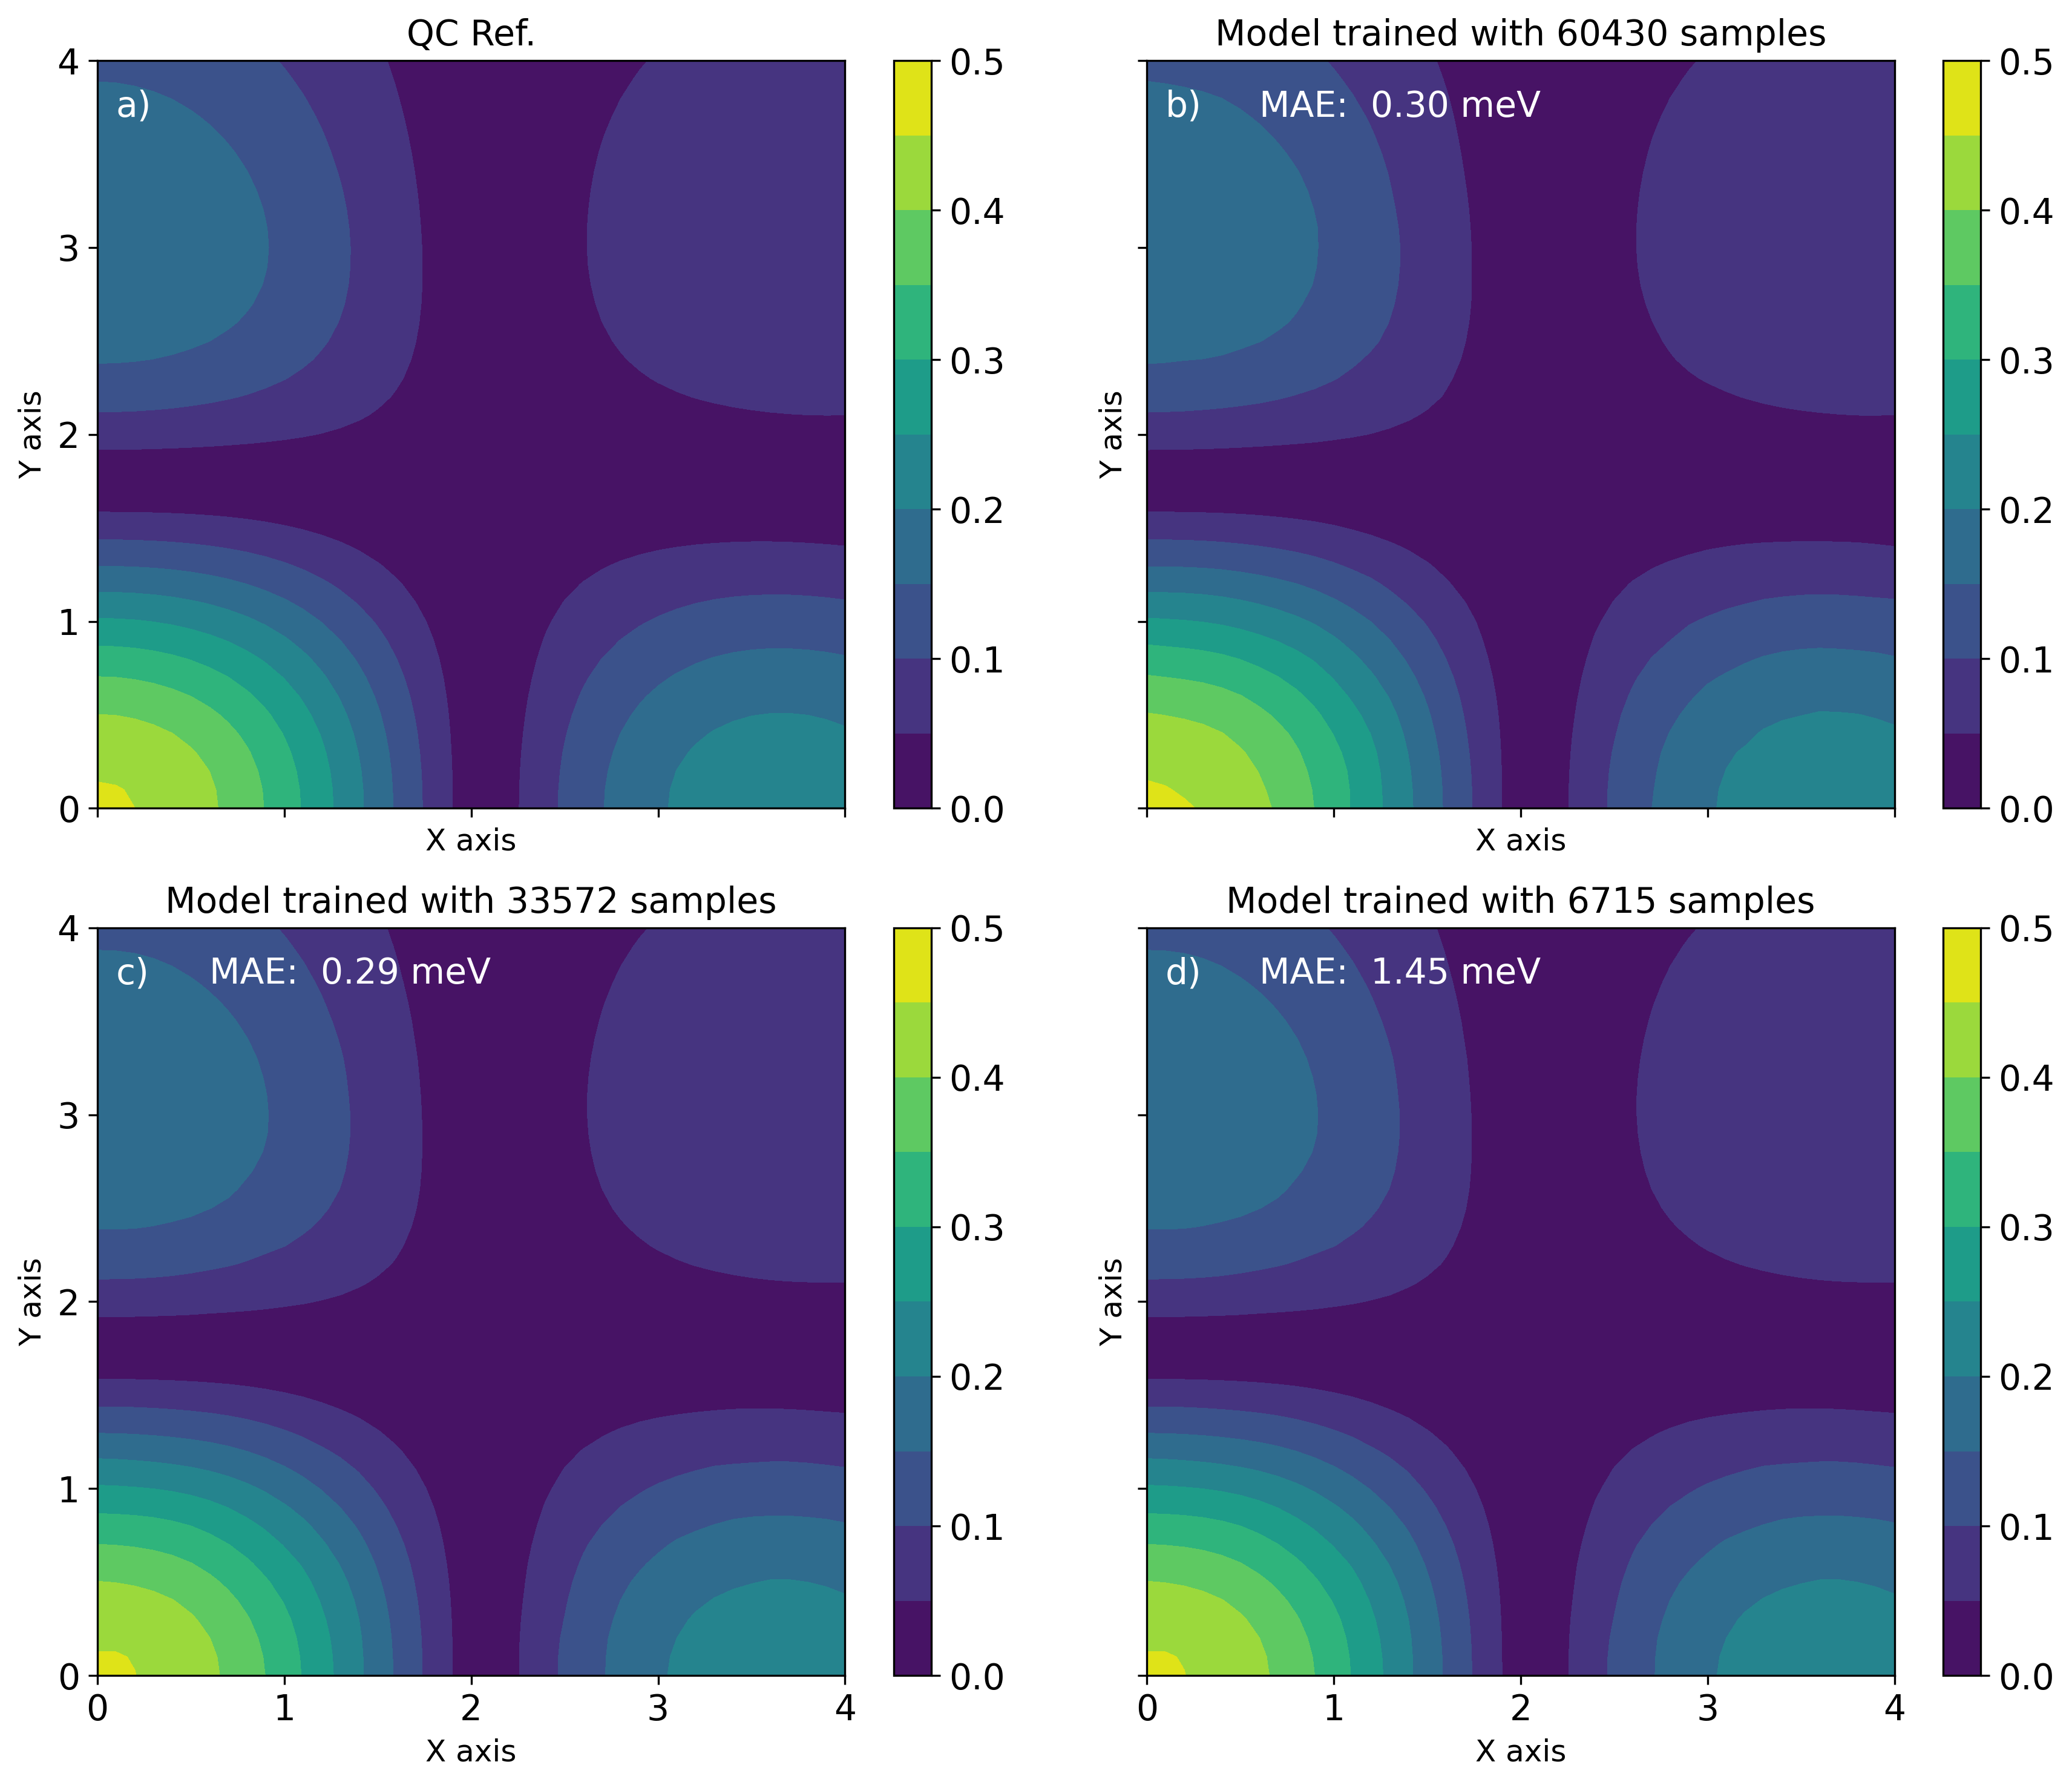

In [25]:
ndim = np.int64(np.sqrt(len(homo_pairs[istart:iend])))
print(ndim)
Z =raw_data2[:,3].reshape((41,41)) *au2ev
Z0=base1.reshape((ndim,ndim)) * au2ev  # 90
Z1=base2.reshape((ndim,ndim)) * au2ev # 50
Z2=base2.reshape((ndim,ndim)) * au2ev # 10

x = np.linspace(0, 4, 41)
y = np.linspace(0, 4, 41)

Z_ = np.array([Z,Z0,Z1,Z2])
anna = np.array(['a)','b)','c)','d)']).reshape((2,2))
iplist = [ii for ii, i in np.ndenumerate(anna)]

titles = np.array(['QC Ref.', 'Model trained with 60430 samples', 'Model trained with 33572 samples', 'Model trained with 6715 samples']).reshape((2,2))

l = np.linspace(0,0.5,11)

print(iplist)

fig2, ax2 = plt.subplots(2,2,figsize=(12,10), dpi=300, sharex=True, sharey=True)
# plt.rcParams.update({'font.size':14})
# plt.rc('font',family='Times New Roman')
for jj , j in enumerate(iplist):
    print(Z_[j[0]*2+j[1]].shape[0])
    x = np.linspace(0, 4, Z_[j[0]*2+j[1]].shape[0])
    y = np.linspace(0, 4, Z_[j[0]*2+j[1]].shape[0])
    exec('a%d = ax2[j].contourf(x,y, Z_[j[0]*2+j[1]].T,levels= l)'%(jj))
    # ax2[jj].contourf(x,y, Z_[jj[0]*2+jj[1]].T,levels= l)
    ax2[j].set_aspect('equal')
    ax2[j].set_title(titles[j],fontsize=14)
    ax2[j].set_xlabel('X axis',fontsize=12)
    ax2[j].set_ylabel('Y axis',fontsize=12)
    ax2[j].annotate(anna[j],(0.1,3.7),fontsize=14,color='w')
    exec('fig2.colorbar(a%d,ax=ax2[j])'%(jj))

    ax2[j].set_yticks(np.arange(0,4.01,1))
    ax2[j].set_xticks(np.arange(0,4.01,1))

ax2[0,1].annotate('MAE: %5.2f meV'%error_base1, (0.6,3.7), fontsize=14,color='w')
ax2[1,0].annotate('MAE: %5.2f meV'%error_base2, (0.6,3.7), fontsize=14,color='w')
ax2[1,1].annotate('MAE: %5.2f meV'%error_base3, (0.6,3.7), fontsize=14,color='w')

plt.tight_layout()
# plt.savefig('./Baseline_trans_90_50_10.png')


## Rotation + translation 

In [26]:
# original_1 = tf.keras.models.load_model('./trained_model/rot/nat_dimer_baseline_trans_60430/model', compile=False)
# original_2 = tf.keras.models.load_model('./trained_model/rot/nat_dimer_baseline_trans_33572/model', compile=False)
# original_3 = tf.keras.models.load_model('./trained_model/rot/nat_dimer_baseline_trans_6715/model', compile=False)

original_1 = tf.keras.models.load_model('./trained_model/mix/nat_dimer_baseline_mix_28520/model', compile=False)
original_2 = tf.keras.models.load_model('./trained_model/mix/nat_dimer_baseline_mix_15844/model', compile=False)
original_3 = tf.keras.models.load_model('./trained_model/mix/nat_dimer_baseline_mix_3169/model', compile=False)

base1 = np.exp(-original_1(homo_pairs[istart:iend], training=False).numpy().reshape((len(homo_pairs[istart:iend]),)))
base2 = np.exp(-original_2(homo_pairs[istart:iend], training=False).numpy().reshape((len(homo_pairs[istart:iend]),)))
base3 = np.exp(-original_3(homo_pairs[istart:iend], training=False).numpy().reshape((len(homo_pairs[istart:iend]),)))

error_base1 = np.mean(abs(base1-raw_data1[:,3])*27.2114*1000)
error_base2 = np.mean(abs(base2-raw_data1[:,3])*27.2114*1000)
error_base3 = np.mean(abs(base3-raw_data1[:,3])*27.2114*1000)

print(error_base1, error_base2, error_base3)

1.055512254253555 1.0904151503714985 3.37765674414692


41
[(0, 0), (0, 1), (1, 0), (1, 1)]
41
41
41
41


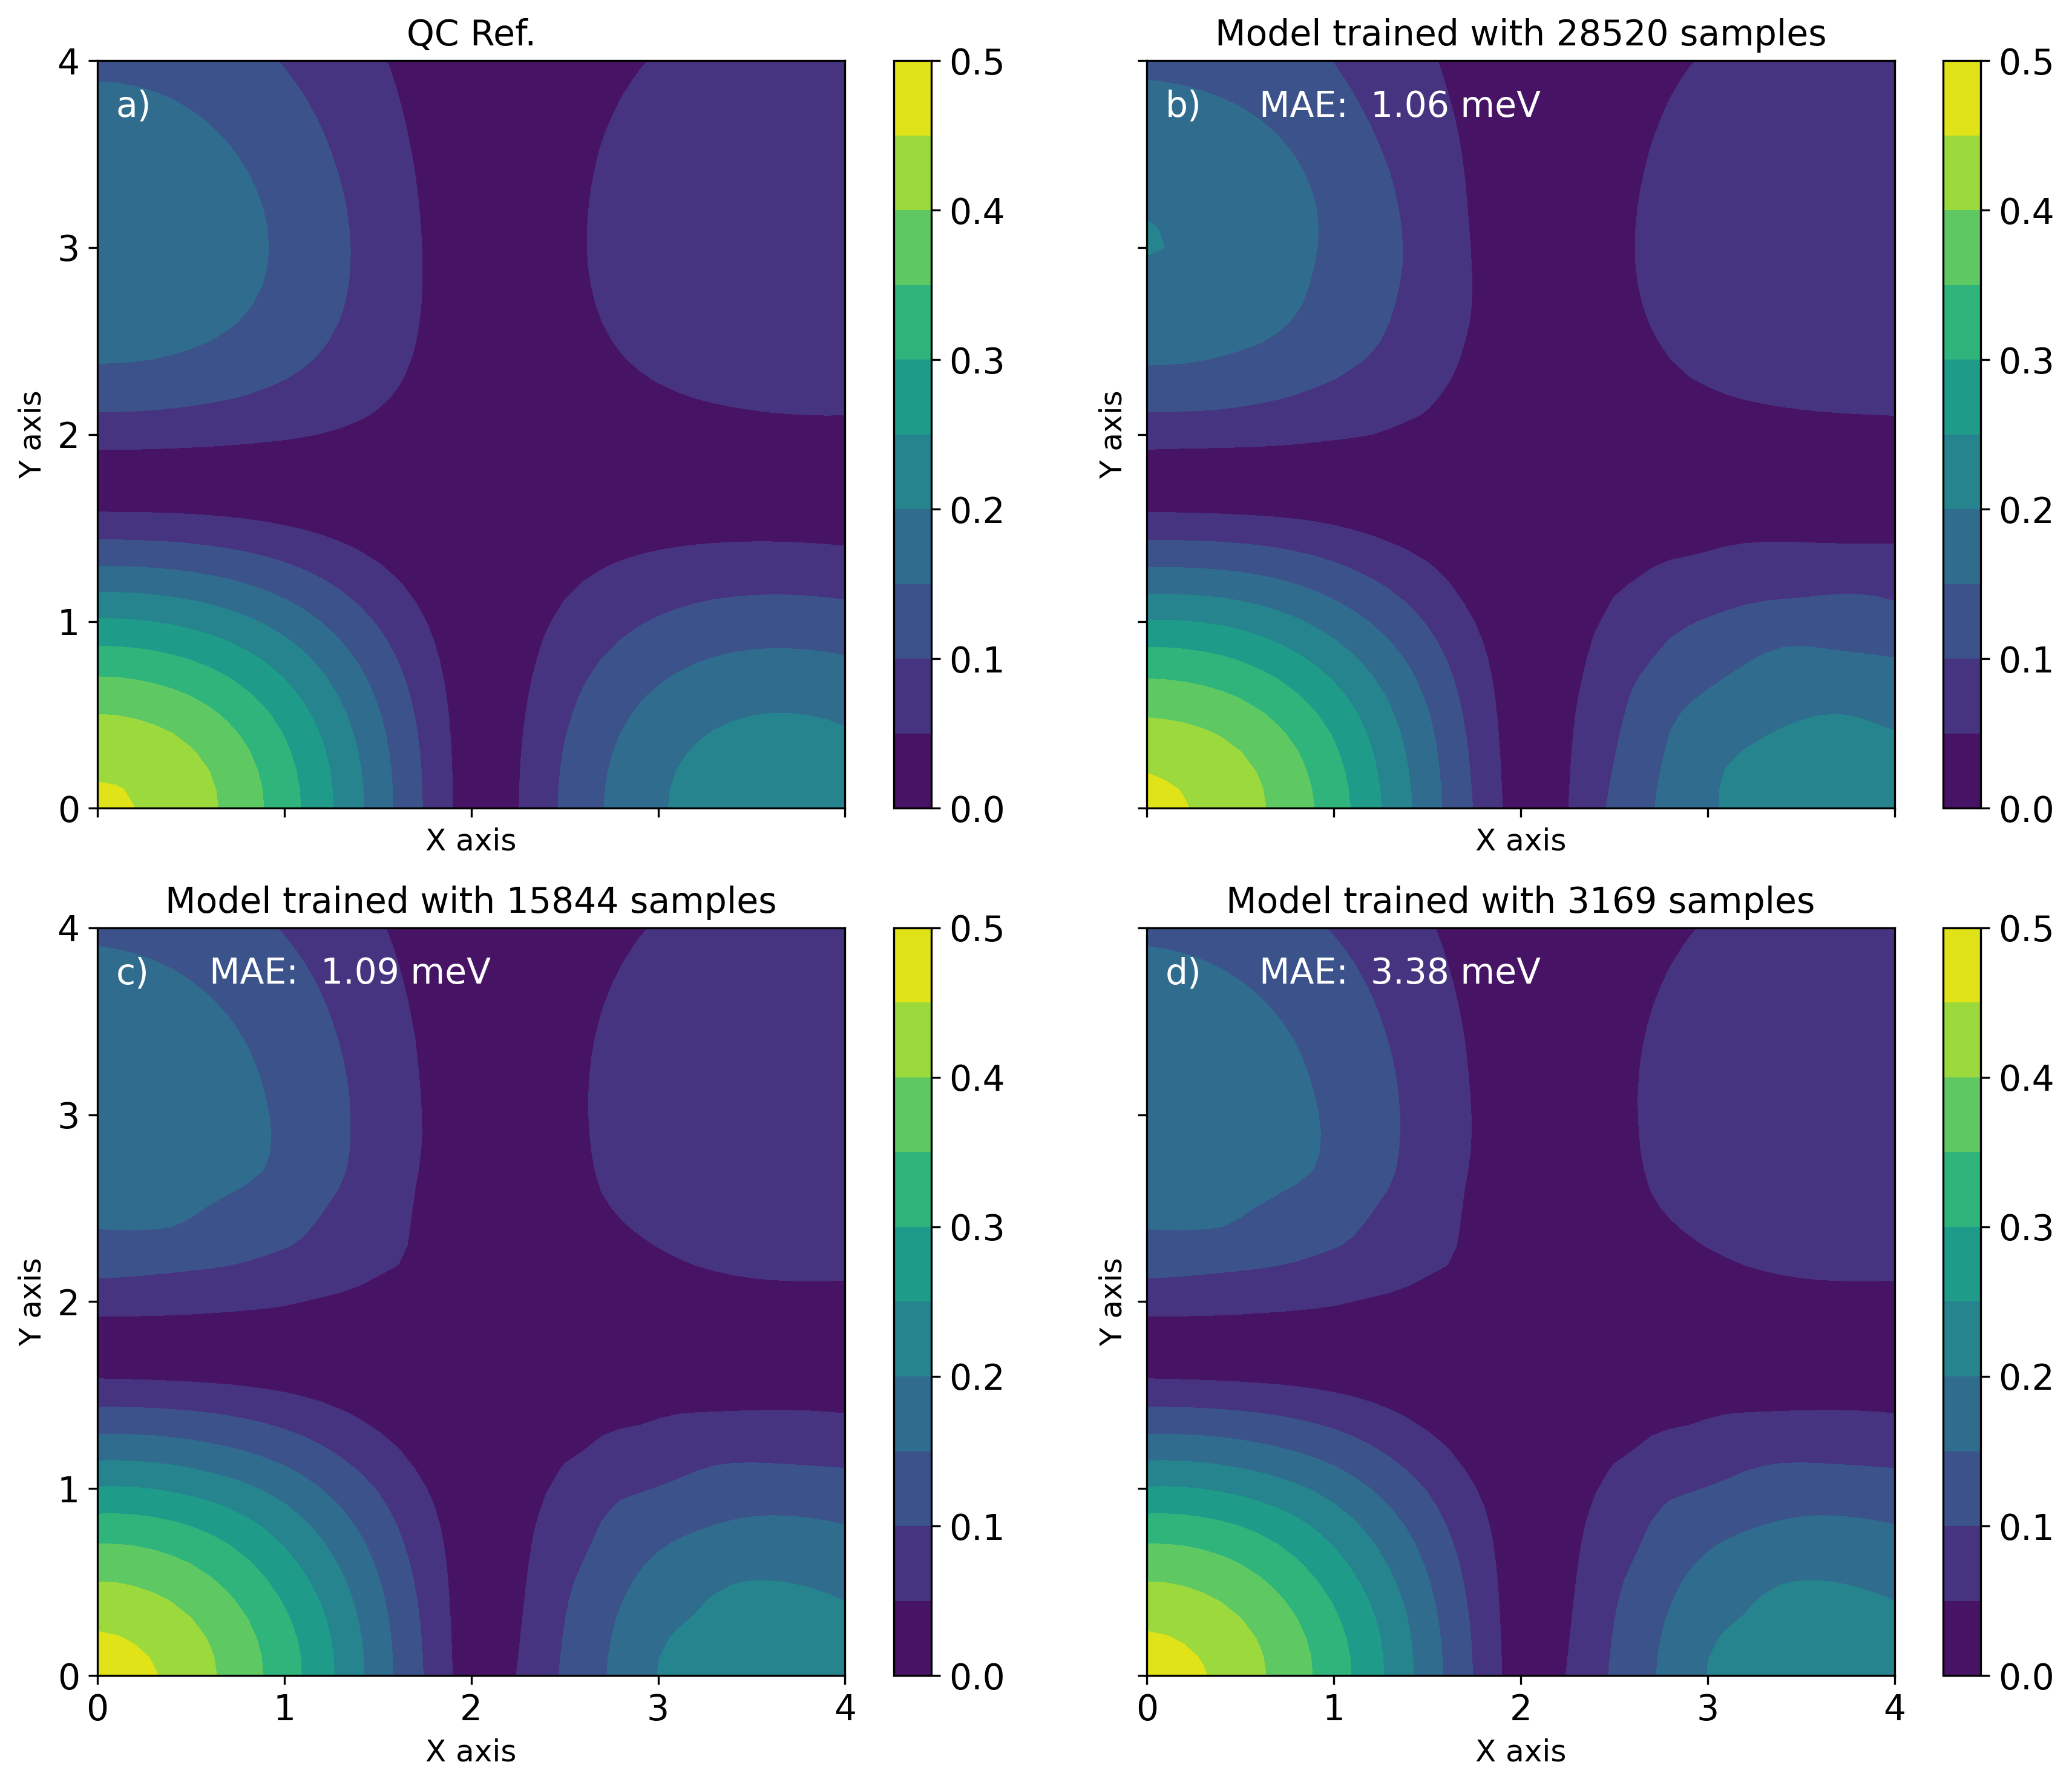

In [27]:
ndim = np.int64(np.sqrt(len(homo_pairs[istart:iend])))
print(ndim)
Z =raw_data2[:,3].reshape((41,41)) *au2ev
Z0=base1.reshape((ndim,ndim)) * au2ev  # 90
Z1=base2.reshape((ndim,ndim)) * au2ev # 50
Z2=base2.reshape((ndim,ndim)) * au2ev # 10

x = np.linspace(0, 4, 41)
y = np.linspace(0, 4, 41)

Z_ = np.array([Z,Z0,Z1,Z2])
anna = np.array(['a)','b)','c)','d)']).reshape((2,2))
iplist = [ii for ii, i in np.ndenumerate(anna)]

titles = np.array(['QC Ref.', 'Model trained with 28520 samples', 'Model trained with 15844 samples', 'Model trained with 3169 samples']).reshape((2,2))

l = np.linspace(0,0.5,11)

print(iplist)

fig2, ax2 = plt.subplots(2,2,figsize=(12,10), dpi=300, sharex=True, sharey=True)
# plt.rcParams.update({'font.size':14})
# plt.rc('font',family='Times New Roman')
for jj , j in enumerate(iplist):
    print(Z_[j[0]*2+j[1]].shape[0])
    x = np.linspace(0, 4, Z_[j[0]*2+j[1]].shape[0])
    y = np.linspace(0, 4, Z_[j[0]*2+j[1]].shape[0])
    exec('a%d = ax2[j].contourf(x,y, Z_[j[0]*2+j[1]].T,levels= l)'%(jj))
    # ax2[jj].contourf(x,y, Z_[jj[0]*2+jj[1]].T,levels= l)
    ax2[j].set_aspect('equal')
    ax2[j].set_title(titles[j],fontsize=14)
    ax2[j].set_xlabel('X axis',fontsize=12)
    ax2[j].set_ylabel('Y axis',fontsize=12)
    ax2[j].annotate(anna[j],(0.1,3.7),fontsize=14,color='w')
    exec('fig2.colorbar(a%d,ax=ax2[j])'%(jj))

    ax2[j].set_yticks(np.arange(0,4.01,1))
    ax2[j].set_xticks(np.arange(0,4.01,1))

ax2[0,1].annotate('MAE: %5.2f meV'%error_base1, (0.6,3.7), fontsize=14,color='w')
ax2[1,0].annotate('MAE: %5.2f meV'%error_base2, (0.6,3.7), fontsize=14,color='w')
ax2[1,1].annotate('MAE: %5.2f meV'%error_base3, (0.6,3.7), fontsize=14,color='w')

plt.tight_layout()
# plt.savefig('./Baseline_mix_90_50_10.png')


## Performance plot of translation + rotation for the full translation dataset

In [28]:
# original_1 = tf.keras.models.load_model('./trained_model/rot/nat_dimer_baseline_trans_60430/model', compile=False)
# original_2 = tf.keras.models.load_model('./trained_model/rot/nat_dimer_baseline_trans_33572/model', compile=False)
# original_3 = tf.keras.models.load_model('./trained_model/rot/nat_dimer_baseline_trans_6715/model', compile=False)

homo_pairs = np.load('../../data/jpcl_makeup/baseline.npy')
raw_data1 = abs(np.loadtxt('../../data/results.csv', delimiter=',',comments='#'))
print(homo_pairs.shape)

original_1 = tf.keras.models.load_model('./trained_model/mix/nat_dimer_baseline_mix_28520/model', compile=False)
original_2 = tf.keras.models.load_model('./trained_model/mix/nat_dimer_baseline_mix_15844/model', compile=False)
original_3 = tf.keras.models.load_model('./trained_model/mix/nat_dimer_baseline_mix_3169/model', compile=False)

base1 = np.exp(-original_1(homo_pairs, training=False).numpy().reshape((len(homo_pairs),)))
base2 = np.exp(-original_2(homo_pairs, training=False).numpy().reshape((len(homo_pairs),)))
base3 = np.exp(-original_3(homo_pairs, training=False).numpy().reshape((len(homo_pairs),)))

# error_base1 = np.mean(np.multiply(abs(base1-raw_data1[:,3]), np.power(raw_data1[:,3],-1))*100)
error_base1 = np.mean(abs(base1-raw_data1[:,3])*27.2114*1000)
error_base2 = np.mean(abs(base2-raw_data1[:,3])*27.2114*1000)
error_base3 = np.mean(abs(base3-raw_data1[:,3])*27.2114*1000)

print(error_base1, error_base2, error_base3)

(68921, 2, 3)
0.4620564334025139 0.4839871148087497 1.4564996168064452


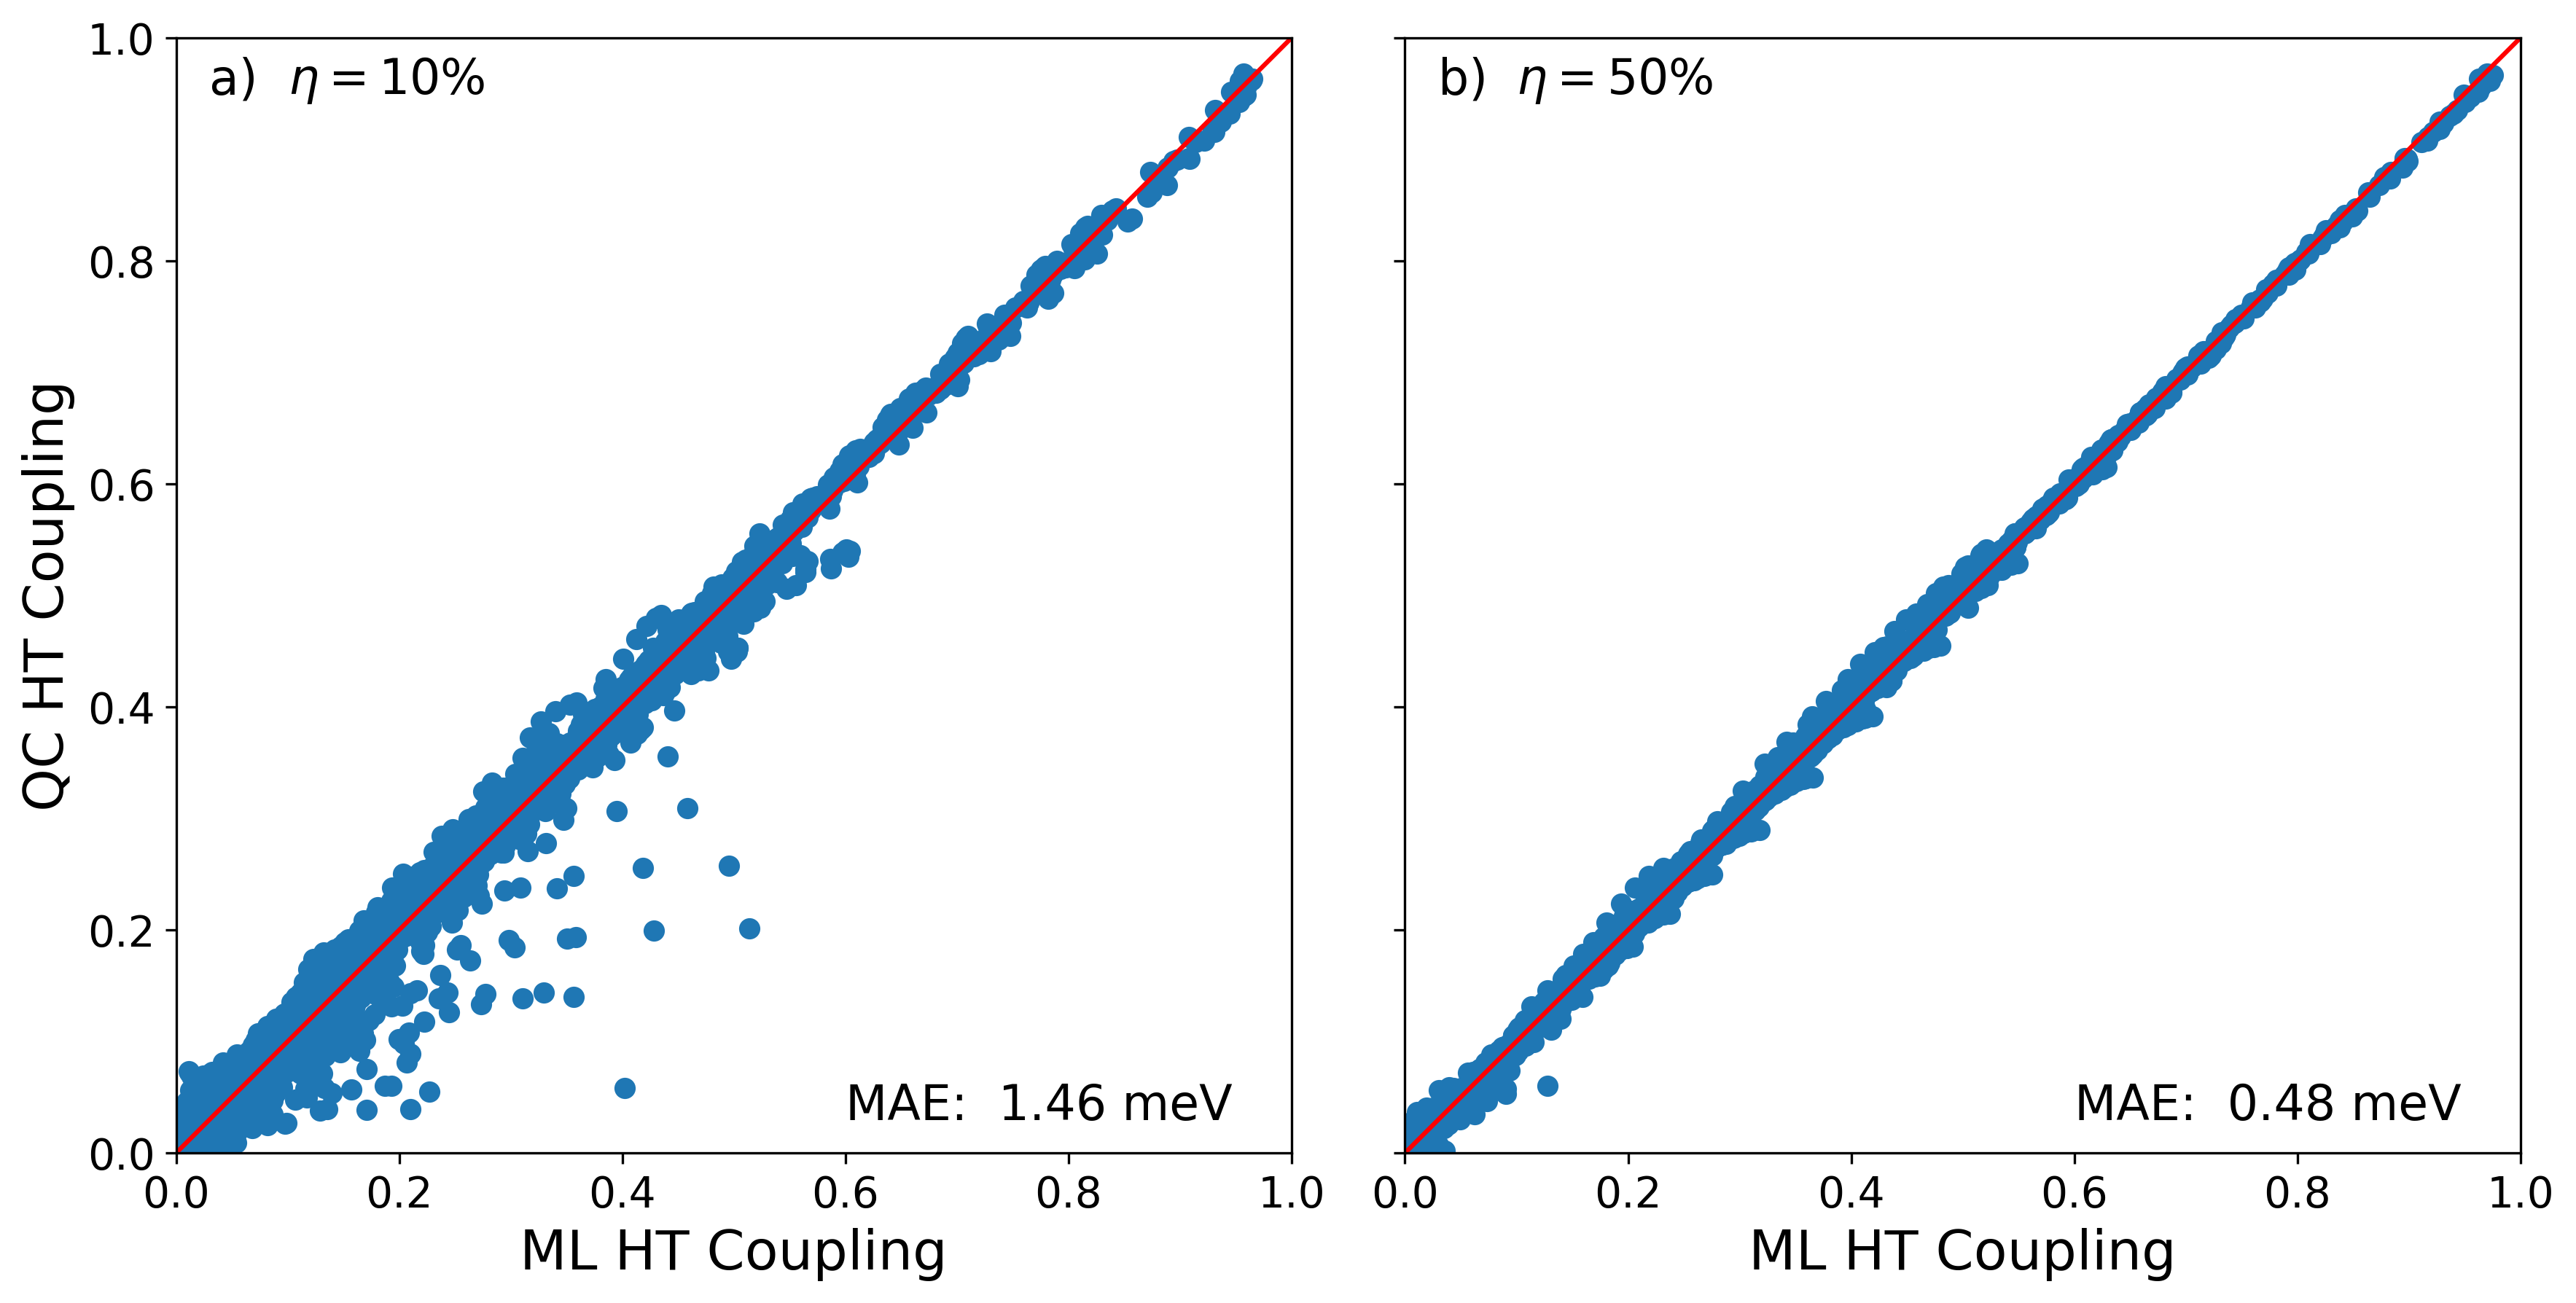

In [ ]:
Z0 = raw_data2 = abs(np.loadtxt('../../data/results.csv', delimiter=',',comments='#'))[:,3] * au2ev
Z1=base2 * au2ev # 50
Z2=base3 * au2ev # 10

x0 = [0,1.25]
y0 = [0,1.25]

Z_ = np.array([Z2,Z1])
anna = np.array(['a)','b)'])
labels = np.array(['$\eta=$10$\%$','$\eta=$50$\%$'])

l = np.linspace(np.min(Z0),np.max(Z0),21)

fig2, ax2 = plt.subplots(1,2,figsize=(12,6), dpi=300, sharey=True)
plt.rcParams.update({'font.size':14})
for ii,i in np.ndenumerate(anna):
    
    ax2[ii].scatter(Z_[ii], Z0)
    ax2[ii].set_aspect('equal')
    ax2[ii].annotate('%s'%labels[ii], (0.1,0.95), fontsize=16,color='black')
    ax2[ii].set_xlabel('ML HT Coupling',fontsize=18)
    ax2[ii].annotate(anna[ii],(0.03,0.95),fontsize=16,color='black')
    ax2[ii].set_xlim(0,1)
    ax2[ii].set_ylim(0,1)
    ax2[ii].plot(x0,y0, color='r')

ax2[0].set_ylabel('QC HT Coupling',fontsize=18)
ax2[0].annotate('MAE: %5.2f meV'%error_base3, (0.6,0.03), fontsize=16,color='black')
ax2[1].annotate('MAE: %5.2f meV'%error_base2, (0.6,0.03), fontsize=16,color='black')

plt.tight_layout()
# plt.savefig('./Performance_baseline_mix_90_50_10.png')


# Checking Z rot descriptor

In [40]:

des_type = 'z_rot_10_sg'
homo_pairs = np.load('../../data/jpcl_makeup/homo_homo_pair_%s.npy'%des_type)
    
raw_data1 = abs(np.loadtxt('../../data/jpcl_makeup/results_trans_%s.csv'%des_type, delimiter=',',comments='#'))[:,3]
raw_data2 = abs(np.loadtxt('../../data/results.csv', delimiter=',',comments='#'))
print(raw_data1.shape)
print(homo_pairs.shape)


(441,)
(441, 2, 8, 8)


In [41]:
# original_1 = tf.keras.models.load_model('../../article_model/trans/nat_dimer_homo_trans_60430/model', compile=False)
# original_1 = tf.keras.models.load_model('../../article_model/trans/nat_dimer_homo_trans_53716/model', compile=False)
# original_2 = tf.keras.models.load_model('../../article_model/trans/nat_dimer_homo_trans_33572/model', compile=False)

original_1 = tf.keras.models.load_model('../../article_model/mix2/nat_dimer_homo_mix_28476/model', compile=False)
original_2 = tf.keras.models.load_model('../../article_model/mix2/nat_dimer_homo_mix_15821/model', compile=False)
original_3 = tf.keras.models.load_model('../../article_model/mix2/nat_dimer_homo_mix_3165/model', compile=False)


print(homo_pairs.shape, raw_data1.shape)
base1 = np.exp(-original_1(homo_pairs, training=False).numpy().reshape((len(homo_pairs),)))
base2 = np.exp(-original_2(homo_pairs, training=False).numpy().reshape((len(homo_pairs),)))
base3 = np.exp(-original_3(homo_pairs, training=False).numpy().reshape((len(homo_pairs),)))


# error_base1 = np.mean(np.multiply(abs(base1-raw_data1[:,3]), np.power(raw_data1[:,3],-1))*100)
error_base1 = np.mean(abs(base1-raw_data1)*27.2114*1000)
error_base2 = np.mean(abs(base2-raw_data1)*27.2114*1000)
error_base3 = np.mean(abs(base3-raw_data1)*27.2114*1000)

print(error_base1,error_base2, error_base3)

(441, 2, 8, 8) (441,)
86.14045157451471 92.77094519639049 70.70899752612016


21


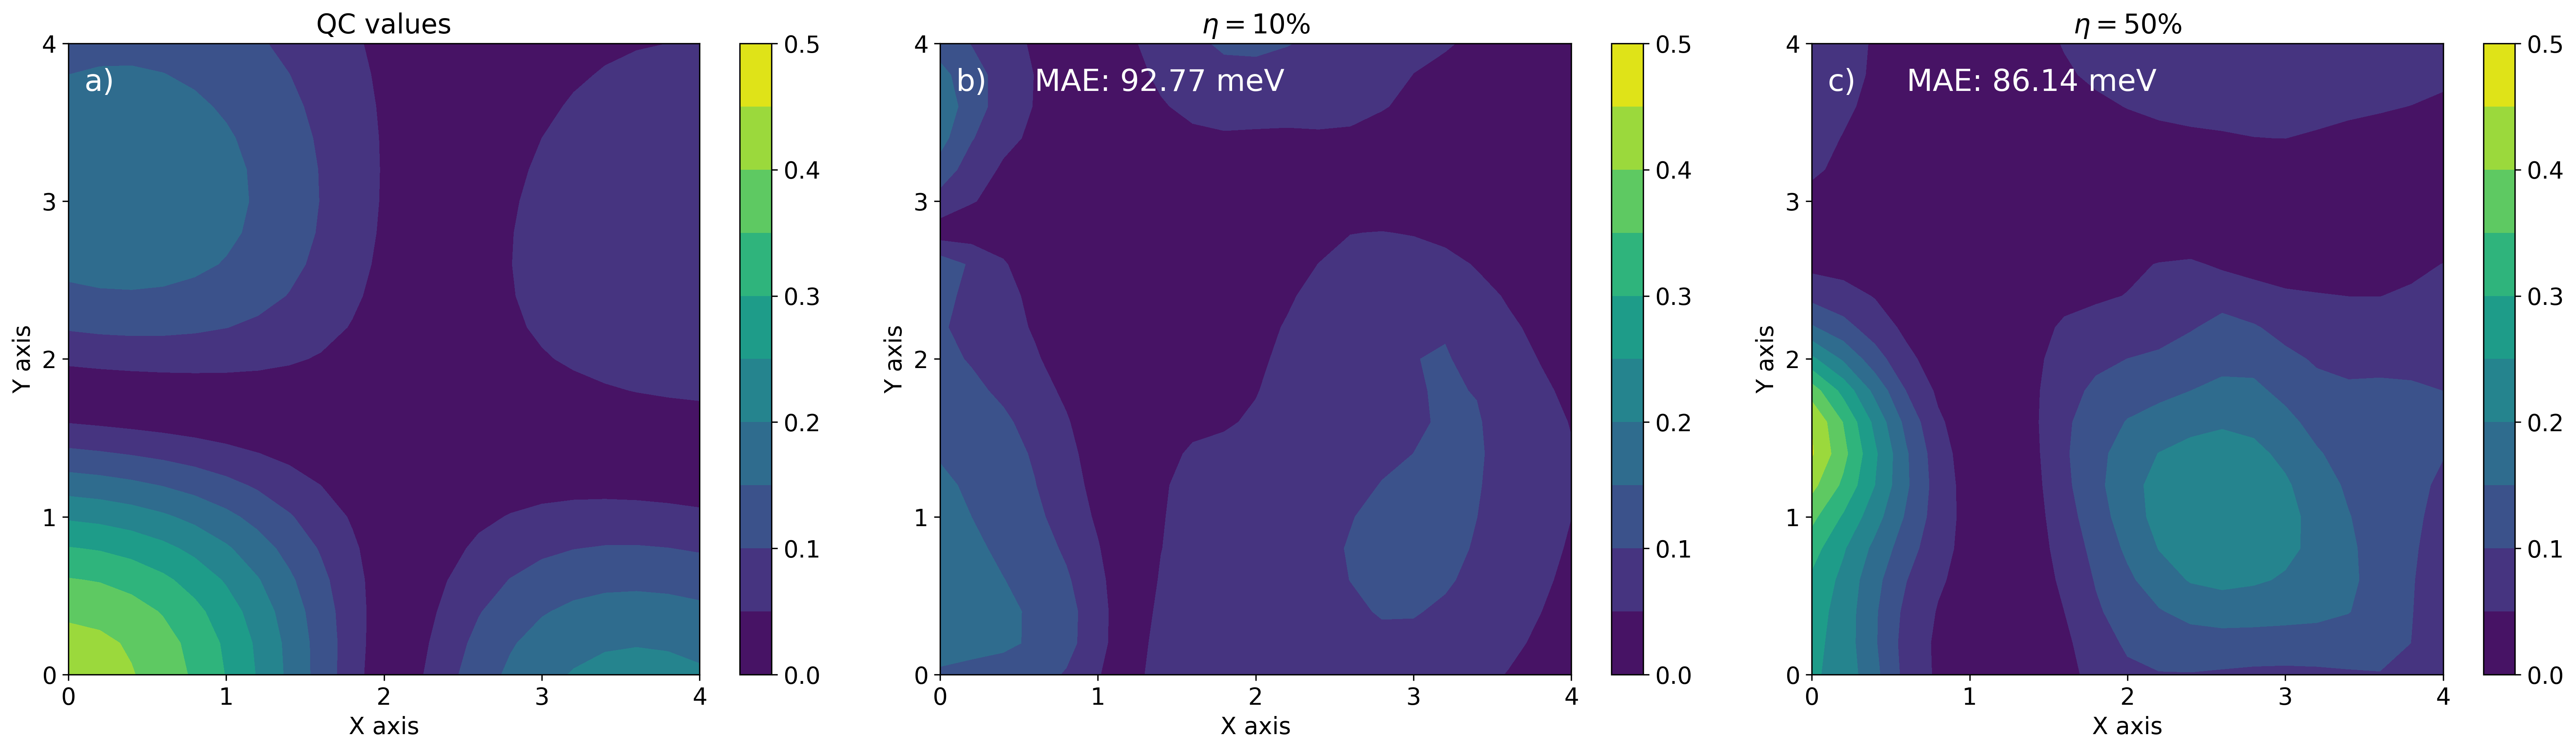

In [ ]:
ndim = np.int64(np.sqrt(len(homo_pairs)))
print(ndim)
Z =raw_data1.reshape((21,21)) *au2ev
Z0=base1.reshape((ndim,ndim)) * au2ev  # 90
Z1=base2.reshape((ndim,ndim)) * au2ev # 50
Z2=base3.reshape((ndim,ndim)) * au2ev # 10

x = np.linspace(0, 4, ndim)
y = np.linspace(0, 4, ndim)

line = np.arange(0,4.1,0.1)
amp = np.ones(len(line))*4


Z_ = np.array([Z,Z2,Z1])
anna = np.array(['a)','b)','c)'])
titles = np.array(['QC values', '$\eta=10\%$', '$\eta=50\%$'])

# l = np.linspace(np.min(Z0),np.max(Z2),11)
l = np.linspace(0,0.5,11)


fig2, ax2 = plt.subplots(1,3,figsize=(22,6), dpi=300)
plt.rcParams.update({'font.size':14})
# plt.rc('font',family='Times New Roman')
for ii,i in np.ndenumerate(anna):
    exec('a%d = ax2[ii].contourf(x,y, Z_[ii].T,levels= l)'%(ii))
    ax2[ii].contourf(x,y, Z_[ii].T,levels= l)
    ax2[ii].set_aspect('equal')
    ax2[ii].set_title(titles[ii],fontsize=16)
    ax2[ii].set_xlabel('X axis',fontsize=14)
    ax2[ii].set_ylabel('Y axis',fontsize=14)
    ax2[ii].annotate(anna[ii],(0.1,3.7),fontsize=18,color='w')
    ax2[ii].set_yticks(np.arange(0,4.01,1))
    ax2[ii].set_xticks(np.arange(0,4.01,1))
    exec('fig2.colorbar(a%d,ax=ax2[ii])'%(ii))



ax2[1].annotate('MAE: %5.2f meV'%error_base2, (0.6,3.7), fontsize=18,color='w')
ax2[2].annotate('MAE: %5.2f meV'%error_base1, (0.6,3.7), fontsize=18,color='w')

plt.tight_layout()
# plt.savefig('./Extension_z_rot_10_sg.png')


21
[(0, 0), (0, 1), (1, 0), (1, 1)]
21
21
21
21


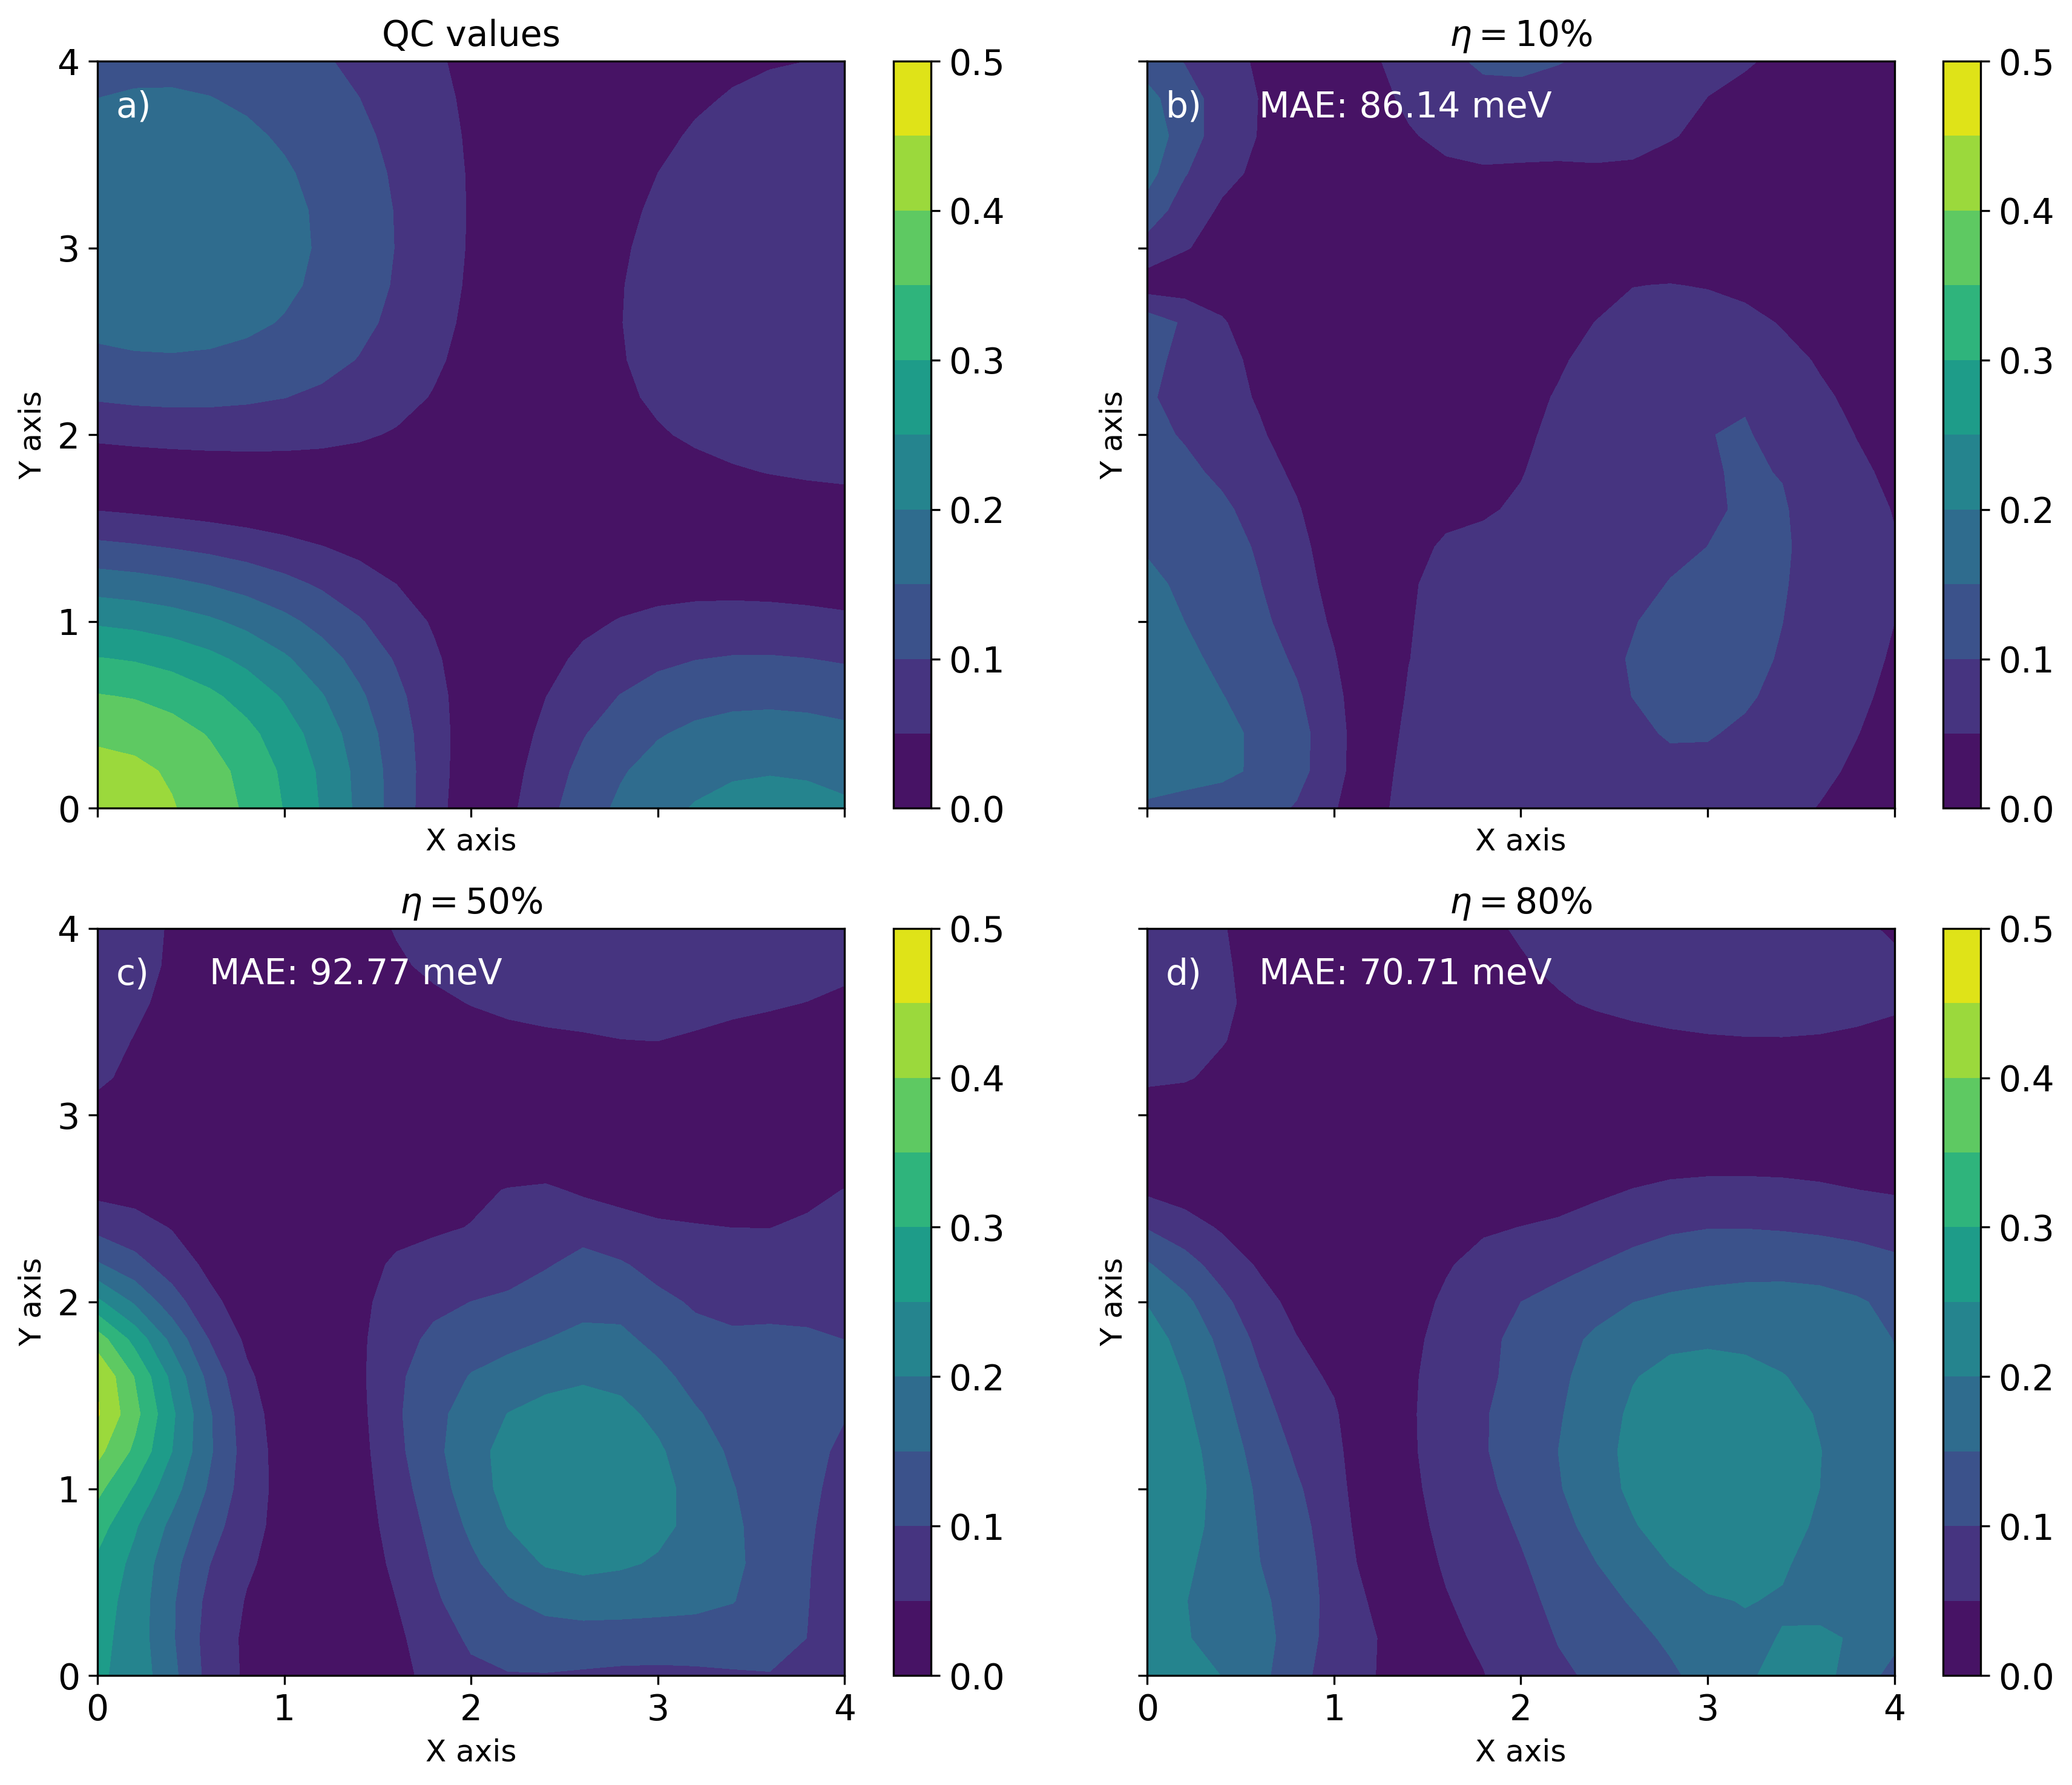

In [ ]:
ndim = np.int64(np.sqrt(len(homo_pairs)))
print(ndim)
Z =raw_data1.reshape((21,21)) *au2ev
Z0=base1.reshape((ndim,ndim)) * au2ev  # 90
Z1=base2.reshape((ndim,ndim)) * au2ev # 50
Z2=base3.reshape((ndim,ndim)) * au2ev # 10

x = np.linspace(0, 4, 41)
y = np.linspace(0, 4, 41)

Z_ = np.array([Z,Z2,Z1,Z0])
anna = np.array(['a)','b)','c)','d)']).reshape((2,2))
iplist = [ii for ii, i in np.ndenumerate(anna)]

# titles = np.array(['QC Ref.', 'Model trained with 60430 samples', 'Model trained with 33572 samples', 'Model trained with 6715 samples']).reshape((2,2))
titles = np.array(['QC values', '$\eta=10\%$', '$\eta=50\%$', '$\eta=80\%$']).reshape((2,2))


l = np.linspace(0,0.5,11)

print(iplist)

fig2, ax2 = plt.subplots(2,2,figsize=(12,10), dpi=300, sharex=True, sharey=True)
# plt.rcParams.update({'font.size':14})
# plt.rc('font',family='Times New Roman')
for jj , j in enumerate(iplist):
    print(Z_[j[0]*2+j[1]].shape[0])
    x = np.linspace(0, 4, Z_[j[0]*2+j[1]].shape[0])
    y = np.linspace(0, 4, Z_[j[0]*2+j[1]].shape[0])
    exec('a%d = ax2[j].contourf(x,y, Z_[j[0]*2+j[1]].T,levels= l)'%(jj))
    # ax2[jj].contourf(x,y, Z_[jj[0]*2+jj[1]].T,levels= l)
    ax2[j].set_aspect('equal')
    ax2[j].set_title(titles[j],fontsize=14)
    ax2[j].set_xlabel('X axis',fontsize=12)
    ax2[j].set_ylabel('Y axis',fontsize=12)
    ax2[j].annotate(anna[j],(0.1,3.7),fontsize=14,color='w')
    exec('fig2.colorbar(a%d,ax=ax2[j])'%(jj))

    ax2[j].set_yticks(np.arange(0,4.01,1))
    ax2[j].set_xticks(np.arange(0,4.01,1))

ax2[0,1].annotate('MAE: %5.2f meV'%error_base1, (0.6,3.7), fontsize=14,color='w')
ax2[1,0].annotate('MAE: %5.2f meV'%error_base2, (0.6,3.7), fontsize=14,color='w')
ax2[1,1].annotate('MAE: %5.2f meV'%error_base3, (0.6,3.7), fontsize=14,color='w')

plt.tight_layout()
# plt.savefig('./Extension_z_rot_10_sg.png')
